In [ ]:
import pickle
import numpy as np

X = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['x']
print("shape of X:", np.shape(X))

y = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['y']
print("shape of y:", np.shape(y))

nb_COFs = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['nb_COFs']
print("# COFs:", nb_COFs)

def functionXY(Xinput):
  for i, input in enumerate(X):
    if np.array_equal(Xinput, input):
      return y[i]
  return None

# Testing functionXY():
print(X[56])
print(y[56])

print(functionXY(X[56]))

shape of X: (98694, 7)
shape of y: (98694,)
# COFs: 98694
[0.05436893 0.54681128 0.41890404 0.90909091 0.0797649  0.2263727
 0.1648951 ]
10.44
10.44


In [ ]:
# Code for Particle Swarm Optimization. 

import numpy as np
import random

def objective_function(x):
    # x is a tuple of discrete feature values, corresponding to each feature in X

    # Convert the input tuple to a NumPy array
    x = np.array(x)

    # Find the closest data point in the dataset
    distances = np.sum((X - x)**2, axis=1)
    closest_index = np.argmin(distances)

    # Snap the input to the closest data point
    snapped_input = X[closest_index]

    return y[closest_index]

def clip_position(x):
    x = np.array(x)
    
    distances = np.sum((X - x)**2, axis=1)
    closest_index = np.argmin(distances)
    
    snapped_input = X[closest_index]
    
    return snapped_input
    
class Particle:
    def __init__(self, num_dimensions, lower_bound, upper_bound, init_position, index):
        self.position = init_position
        self.velocity = np.zeros(num_dimensions)
        self.best_position = np.copy(self.position)
        self.best_fitness = objective_function(self.position)
        self.index = index

class PSO:
    def __init__(self, num_particles, num_dimensions, lower_bound, upper_bound, w, c1, c2, num_iterations, init_positions):
        self.num_particles = num_particles
        self.num_dimensions = num_dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.num_iterations = num_iterations
        self.particles = [Particle(num_dimensions, lower_bound, upper_bound, init_positions[ind], ind) for ind in range(num_particles)]
        self.global_best_position = np.copy(self.particles[0].position)
        self.global_best_fitness = self.particles[0].best_fitness

    def update_particles(self):
        for particle in self.particles:
            # Update velocities
            particle.velocity = (self.w * particle.velocity
                                 + self.c1 * np.random.rand() * (particle.best_position - particle.position)
                                 + self.c2 * np.random.rand() * (self.global_best_position - particle.position))
            if(not np.array_equal(particle.velocity, np.zeros(self.num_dimensions))):
                particle.velocity = particle.velocity / np.linalg.norm(particle.velocity)

            # Update positions
            particle.position = particle.position + particle.velocity

            # Clip positions to stay within bounds
            particle.position = np.clip(particle.position, self.lower_bound, self.upper_bound)
            particle.position = clip_position(particle.position)

    def update_personal_and_global_bests(self):
        for particle in self.particles:
            # Evaluate fitness
            current_fitness = objective_function(particle.position)

            # Update personal best
            if current_fitness > particle.best_fitness:
                particle.best_position = np.copy(particle.position)
                particle.best_fitness = current_fitness

                # Update global best
                if current_fitness > self.global_best_fitness:
                    self.global_best_position = np.copy(particle.position)
                    self.global_best_fitness = current_fitness
            
            print("Particle #", particle.index, ": ")
            print("-> Current Position: ", particle.position)
            print("-> Current Velocity: ", particle.velocity)
            print("-> Current Output: ", functionXY(particle.position))
            print("-> Personal Best Position: ",  particle.best_position)
            
            
        print("---> Global Best Position: ", self.global_best_position, " <---")
        print("---> Global Best Output: ", functionXY(self.global_best_position), " <---")

    def optimize(self):
        for i in range(self.num_iterations):
            print("Iteration #", i, ": ")
            print("x-x-x-x-x-x-x-x-x-x-x")
            self.update_particles()
            self.update_personal_and_global_bests()

        return self.global_best_position, self.global_best_fitness

# Example for testing purposes 
num_particles = 5
num_dimensions = 7
lower_bound = 0
upper_bound = 1.0
w = 8.0
c1 = 8.0
c2 = 8.0
num_iterations = 5

initial_positions_PSO = random.choices(X, k=num_particles)
print(initial_positions_PSO)


pso = PSO(num_particles, num_dimensions, lower_bound, upper_bound, w, c1, c2, num_iterations, initial_positions_PSO)
best_position, best_fitness = pso.optimize()

print("Best position found: ", best_position)
print("Best fitness found: ", best_fitness)



[array([0.08349515, 0.48848205, 0.54411993, 0.7979798 , 0.04813882,
       0.10602443, 0.13958042]), array([0.07378641, 0.54102667, 0.54287338, 0.82828283, 0.05569549,
       0.17553714, 0.11972028]), array([0.15339806, 0.20201436, 0.40545729, 0.64646465, 0.02183039,
       0.08299396, 0.07146853]), array([0.07184466, 0.49027282, 0.47447322, 0.83838384, 0.05849426,
       0.28043814, 0.11370629]), array([0.18446602, 0.05300513, 0.12680788, 0.52525253, 0.0156731 ,
       0.06838927, 0.05370629])]
Iteration # 0 : 
x-x-x-x-x-x-x-x-x-x-x
Particle # 0 : 
-> Current Position:  [0.08349515 0.48848205 0.54411993 0.7979798  0.04813882 0.10602443
 0.13958042]
-> Current Velocity:  [0. 0. 0. 0. 0. 0. 0.]
-> Current Output:  5.66
-> Personal Best Position:  [0.08349515 0.48848205 0.54411993 0.7979798  0.04813882 0.10602443
 0.13958042]
Particle # 1 : 
-> Current Position:  [0.18058252 0.13361436 0.49056325 0.49494949 0.01427372 0.06417638
 0.05874126]
-> Current Velocity:  [ 0.10200771 -0.55207543

In [ ]:
# Just another quick test
print(best_position)
print(functionXY(best_position))

[0.02524272 0.84276923 0.33216354 0.94949495 0.15924993 0.24111782
 0.22377622]
17.33


In [ ]:
# Now we need to see how the particles move!!!

# PLAN: We'll give each particle an array that represents the locations it's traversed!!! 
# with this, we can "track the motion" of each particle, and counting all unique points gives us the sampling count

# We also need to see how black box function calls correspond to the output!!!!!
# I'll achieve this by an array that for each unqiue function call, will check the global maximum and add that to an array
# THis also means ill need to assign an array of unqiue function calls to a pso object

import numpy as np
import random

def objective_function(x):
    # x is a tuple of discrete feature values, corresponding to each feature in X

    # Convert the input tuple to a NumPy array
    x = np.array(x)

    # Find the closest data point in the dataset
    distances = np.sum((X - x)**2, axis=1)
    closest_index = np.argmin(distances)

    # Snap the input to the closest data point
    snapped_input = X[closest_index]

    return y[closest_index]

def clip_position(x):
    x = np.array(x)
    
    distances = np.sum((X - x)**2, axis=1)
    closest_index = np.argmin(distances)
    
    snapped_input = X[closest_index]
    
    return snapped_input

def closest_index(x):
    x = np.array(x)
    
    distances = np.sum((X - x)**2, axis=1)
    closest_index = np.argmin(distances)
    return closest_index    
    
class Particle:
    def __init__(self, num_dimensions, lower_bound, upper_bound, init_position, index):
        self.position = init_position
        self.velocity = np.zeros(num_dimensions)
        self.best_position = np.copy(self.position)
        self.best_fitness = objective_function(self.position)
        self.index = index
        self.positions_traversed = [closest_index(init_position)]

class PSO:
    def __init__(self, num_particles, num_dimensions, lower_bound, upper_bound, w, c1, c2, num_iterations, init_positions):
        #print(num_particles)
        #print(num_iterations)
        self.num_particles = num_particles
        self.num_dimensions = num_dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.num_iterations = num_iterations
        self.particles = [Particle(num_dimensions, lower_bound, upper_bound, init_positions[ind], ind) for ind in range(num_particles)]
        self.global_best_position = np.copy(self.particles[0].position)
        self.global_best_fitness = self.particles[0].best_fitness
        self.unique_function_call_ids = []
        self.global_max_for_each_unique_function_call = []

    def update_particles(self):
        for particle in self.particles:
            # Update velocities
            particle.velocity = (self.w * particle.velocity
                                 + self.c1 * np.random.rand() * (particle.best_position - particle.position)
                                 + self.c2 * np.random.rand() * (self.global_best_position - particle.position))

            if(np.linalg.norm(particle.velocity) > 1.0):
                particle.velocity = particle.velocity / np.linalg.norm(particle.velocity)

            # Update positions
            particle.position = particle.position + particle.velocity

            # Clip positions to stay within bounds
            particle.position = np.clip(particle.position, self.lower_bound, self.upper_bound)
            #print("Particle #", particle.index, " position before clipping: ", particle.position)
            particle.position = clip_position(particle.position)

            particle.positions_traversed.append(closest_index(particle.position))
            #print("Particle #", particle.index, " position after clipping: ", particle.position)
            #print("Particle $", particle.index, " current value: ", functionXY(particle.position))

    def update_personal_and_global_bests(self):
        for particle in self.particles:
            # Evaluate fitness
            unique_function_called = False
            if closest_index(particle.position) not in self.unique_function_call_ids:
                self.unique_function_call_ids.append(closest_index(particle.position))
                unique_function_called = True
            current_fitness = objective_function(particle.position)

            # Update personal best
            if current_fitness > particle.best_fitness:
                particle.best_position = np.copy(particle.position)
                particle.best_fitness = current_fitness

                # Update global best
                if current_fitness > self.global_best_fitness:
                    self.global_best_position = np.copy(particle.position)
                    self.global_best_fitness = current_fitness
            
            if (unique_function_called == True):
                self.global_max_for_each_unique_function_call.append(self.global_best_fitness)

            #print("Particle #", particle.index, ": ")
            #print("-> Current Position: ", particle.position)
            #print("-> Current Velocity: ", particle.velocity)
            #print("-> Current Output: ", functionXY(particle.position))
            #print("-> Personal Best Position: ",  particle.best_position)
            
            
        #print("---> Global Best Position: ", self.global_best_position, " <---")
        #print("---> Global Best Output: ", functionXY(self.global_best_position), " <---")

    def optimize(self):
        for particle in self.particles:
            if closest_index(particle.position) not in self.unique_function_call_ids:
                self.unique_function_call_ids.append(closest_index(particle.position))
            if particle.best_fitness > self.global_best_fitness:
                self.global_best_position = np.copy(particle.position)
                self.global_best_fitness = particle.best_fitness
                self.global_max_for_each_unique_function_call.append(self.global_best_fitness)

        for i in range(self.num_iterations):
            #print("Iteration #", i, ": ")
            #print("x-x-x-x-x-x-x-x-x-x-x")
            self.update_particles()
            self.update_personal_and_global_bests()

        all_positions_traversed = []

        # Let's print out the positions_traversed array for each particle
        for particle in self.particles:
            #print("Positions traversed by Particle #", particle.index, ": ")
            #print(particle.positions_traversed)
            all_positions_traversed.append(particle.positions_traversed)


        return self.global_best_position, self.global_best_fitness, all_positions_traversed, self.unique_function_call_ids, self.global_max_for_each_unique_function_call

# Example usage
num_particles = 10
num_dimensions = 7
lower_bound = 0
upper_bound = 1.0
w = 2.0
c1 = 1.0
c2 = 1.0
num_iterations = 10

initial_positions_PSO = random.choices(X, k=num_particles)
print(initial_positions_PSO)


pso = PSO(num_particles, num_dimensions, lower_bound, upper_bound, w, c1, c2, num_iterations, initial_positions_PSO)
best_position, best_fitness, all_positions, all_function_calls, global_max_per_function_call = pso.optimize()

print("Best position found: ", best_position)
print("Best fitness found: ", best_fitness)
print("All_positions: ", all_positions)
print("All_function_calls: ", all_function_calls)
print("Global_max_per_function_call: ", global_max_per_function_call)


[array([0.13203883, 0.31161026, 0.54236524, 0.70707071, 0.02742793,
       0.07850021, 0.06755245]), array([0.17087379, 0.14322154, 0.31793833, 0.65656566, 0.01987126,
       0.08608342, 0.06237762]), array([0.16893204, 0.25798256, 0.56796211, 0.74747475, 0.0229499 ,
       0.12610588, 0.08741259]), array([0.24854369, 0.12653128, 0.40380273, 0.64646465, 0.01371397,
       0.09886252, 0.06363636]), array([0.0776699 , 0.52529846, 0.5534966 , 0.80808081, 0.05205709,
       0.19912934, 0.09678322]), array([0.11262136, 0.39071897, 0.57901838, 0.78787879, 0.03582424,
       0.08664513, 0.14125874]), array([0.11067961, 0.30452103, 0.44781753, 0.78787879, 0.03638399,
       0.21836821, 0.11874126]), array([0.04466019, 0.46902564, 0.30012365, 0.92929293, 0.09515813,
       0.45176239, 0.32167832]), array([0.01941748, 0.65364103, 0.2150177 , 0.96969697, 0.19759306,
       0.35346159, 0.31328671]), array([0.12038835, 0.31396513, 0.49840301, 0.73737374, 0.03162608,
       0.15994945, 0.1206993 ])]

In [ ]:
!pip install SciencePlots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# now, with this information, we'll try to see how it looks like on a graph, via visualizations.ipynb
import numpy as np 
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import torch
import seaborn as sns
from sklearn.decomposition import PCA
import scienceplots

plt.matplotlib.style.use(['science','nature'])
cool_colors = ['#0A84A4', '#F6C95E', '#6F4E7C', '#9DD967', '#CB472E', '#FFA157', '#8CDCD0']

plt.rcParams.update(plt.rcParamsDefault)

search_to_color = {'BO': cool_colors[0], 'random': cool_colors[1], 'evolutionary': cool_colors[2], 'RF': cool_colors[3], 'RF (div)': cool_colors[5]}

In [ ]:
X = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['x']
print("shape of X:", np.shape(X))

y = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['y']
print("shape of y:", np.shape(y))

nb_COFs = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['nb_COFs']
print("# COFs:", nb_COFs)

nb_runs = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['nb_runs']
print("# runs:", nb_runs)

nb_iterations = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['nb_iterations']
print("# iterations:", nb_iterations)

# feature names
features = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['features']
print(features)

shape of X: (98694, 7)
shape of y: (98694,)
# COFs: 98694
# runs: 50
# iterations: 100
['Density', 'GSA', 'VSA', 'VF', 'PV', 'LCD', 'PLD']


In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_2D = pca.transform(X)

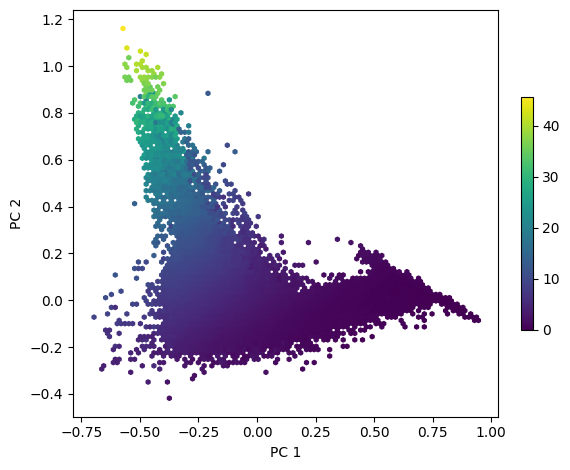

In [ ]:
#low dimensional (PCA) visualization of the entire dataset
plt.hexbin(X_2D[:, 0], X_2D[:, 1], C=y)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
cb = plt.colorbar(fraction=0.02, pad=0.04)
# cb.set_label(label="deliverable capacity\n[L STP/L]")
plt.xticks()
plt.yticks()
plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.savefig('feature_space_colored_by_DC.pdf')
plt.show()

In [ ]:
def find_index(input):

    for i, t in enumerate(X):
        if np.array_equal(t, input):
            return i
    return None

def closest_index(x):
    x = np.array(x)
    
    distances = np.sum((X - x)**2, axis=1)
    closest_index = np.argmin(distances)
    #print("Input: ", x)
    #print("Closest: ", X[closest_index])
    return closest_index


# Testing purposes
print(X[56])
print(closest_index([0.05436893, 0.54681128, 0.41890404, 0.90909091, 0.0797649,  0.2263727,
 0.1648951]))

[0.05436893 0.54681128 0.41890404 0.90909091 0.0797649  0.2263727
 0.1648951 ]
56


In [ ]:
unique_ids = []

for i in range(len(all_positions)):
    ids_acquired = all_positions[i]
    for j in all_positions[i]:
        if j not in unique_ids:
            unique_ids.append(j)

    print(ids_acquired)

print(unique_ids)


print("Black Box Function calls: ", len(unique_ids))

def remove_duplicates(arr):
    unique = set()
    result = []
    for elem in arr:
        if elem not in unique:
            result.append(elem)
            unique.add(elem)
    return result

lol = remove_duplicates(unique_ids)
print(len(lol))

print("All_function_calls: ", len(all_function_calls))

[2434, 18332, 30919, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[51172, 19167, 30919, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[64577, 12175, 30919, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[64817, 40783, 13864, 35235, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[96692, 60503, 24517, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[37923, 5065, 29415, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[92202, 2859, 29000, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[6928, 10864, 28090, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[10979, 21287, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[25220, 25220, 25220, 35235, 36414, 36414, 36414, 36414, 36414, 36414, 36414]
[2434, 18332, 30919, 36414, 51172, 19167, 64577, 12175, 64817, 40783, 13864, 35235, 96692, 60503, 24517, 37923, 5065, 29415, 92202, 2859, 29000, 6928, 10864, 28090, 10979, 21287, 25220]
Black Box Function calls:  27
27
All_f

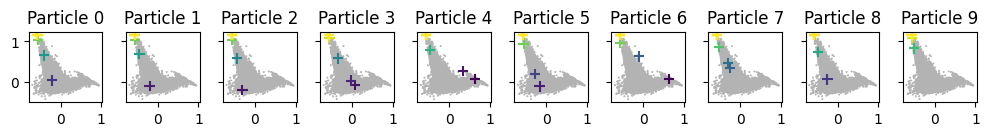

In [ ]:
fig, ax = plt.subplots(1, len(all_positions), sharey=True, sharex=True, figsize=[10, 10])

for a in ax:
    a.set_aspect('equal', 'box')
    a.hexbin(X_2D[:, 0], X_2D[:, 1], C=0.3 * np.ones(nb_COFs), cmap="binary", vmin=0, vmax=1)

for i in range(len(all_positions)):
    ids_acquired = all_positions[i]
    ax[i].scatter(X_2D[ids_acquired, 0], X_2D[ids_acquired, 1], c=y[ids_acquired], marker="+", s=55, vmin=cb.vmin, vmax=cb.vmax)
    ax[i].set_title('Particle {}'.format(i))

plt.tight_layout()
plt.savefig("feature_space_acquired_MOFs.pdf", bbox_inches="tight")
plt.show()


[[2434, 18332, 30919, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414], [51172, 19167, 30919, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414], [64577, 12175, 30919, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414], [64817, 40783, 13864, 35235, 36414, 36414, 36414, 36414, 36414, 36414, 36414], [96692, 60503, 24517, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414], [37923, 5065, 29415, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414], [92202, 2859, 29000, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414], [6928, 10864, 28090, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414], [10979, 21287, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414, 36414], [25220, 25220, 25220, 35235, 36414, 36414, 36414, 36414, 36414, 36414, 36414]]
[2434, 51172, 64577, 64817, 96692, 37923, 92202, 6928, 10979, 25220]
[18332, 19167, 12175, 40783, 60503, 5065, 2859, 10864, 21287, 25220]
[30919, 30919, 30919, 13864, 24517, 29415, 29000, 28090, 36414, 25220]
[364

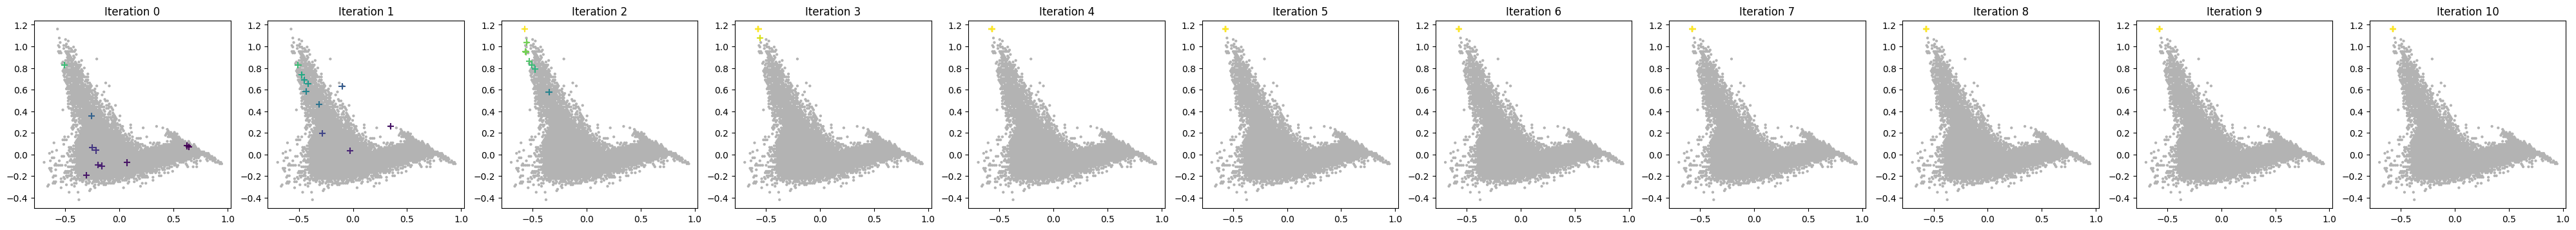

In [ ]:
fig, ax = plt.subplots(1, len(all_positions[0]), figsize=(40, 40))
fig.tight_layout()
print(all_positions)


for a in ax:
    a.set_aspect('equal', 'box')
    a.hexbin(X_2D[:, 0], X_2D[:, 1], C=0.3 * np.ones(nb_COFs), cmap="binary", vmin=0, vmax=1)

for i in range(len(all_positions[0])):
    ids_acquired = [id[i] for id in all_positions]
    print(ids_acquired)
    ax[i].scatter(X_2D[ids_acquired, 0], X_2D[ids_acquired, 1], c=y[ids_acquired], marker="+", s=55, vmin=cb.vmin, vmax=cb.vmax)
    ax[i].set_title('Iteration {}'.format(i))

plt.savefig("iterations_!.pdf", bbox_inches="tight")
plt.show()


In [ ]:
print(global_max_per_function_call)
x_values = np.arange(1, len(global_max_per_function_call) + 1)
print(x_values)

print(len(global_max_per_function_call))
print(len(x_values))

[14.15, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 36.02, 36.02, 36.02, 36.02, 36.11, 36.11, 45.71, 45.71]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
19
19


[14.15, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 31.23, 36.02, 36.02, 36.02, 36.02, 36.11, 36.11, 45.71, 45.71]


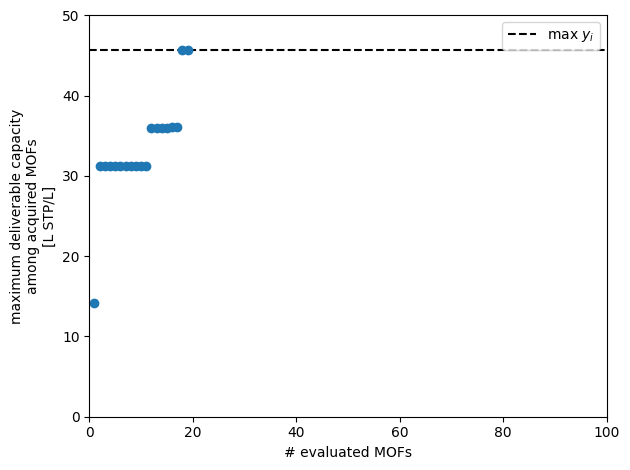

In [ ]:
x_values = np.arange(1, len(global_max_per_function_call) + 1)

print(global_max_per_function_call)

plt.figure()
#plt.plot(range(1, 101), y_maxes_this_run, color=search_to_color['BO'], clip_on=False)
# plt.scatter(nb_COFs_initialization, y_maxes_this_run[nb_COFs_initialization-1], color=search_to_color['BO'], marker="o")
plt.scatter(x_values, global_max_per_function_call)
plt.xlabel('# evaluated MOFs')
plt.ylabel('maximum deliverable capacity\namong acquired MOFs\n[L STP/L]')

plt.axhline(y=45.71, color="k", linestyle="--", label="$\max$ $y_i$", zorder=0)
# axs[0].set_ylim(ymin=0.0)
plt.xlim([0, 100])
plt.ylim([0, 50])
plt.legend()

plt.tight_layout()
plt.savefig("search_efficiency_for_specific_acquisition_run.pdf")
plt.show()

In [ ]:
# We now have to run PSO many times to find an average rate of optimization

num_particles = 10
num_dimensions = 7
lower_bound = 0
upper_bound = 1.0
w = 2.0
c1 = 1.0
c2 = 1.0
num_iterations = 10

nb_runs = 50  # Number of runs of this we're doing!

gmpfc_arr = []
apt_arr = []

for run_no in range(nb_runs):
    print("Run No.: ", run_no)
    initial_positions_PSO = random.choices(X, k=num_particles)
    print("Initial Position for Run No. ", run_no, ": ", initial_positions_PSO)
    pso = PSO(num_particles, num_dimensions, lower_bound, upper_bound, w, c1, c2, num_iterations, initial_positions_PSO)
    best_position, best_fitness, all_positions, all_function_calls, global_max_per_function_call = pso.optimize()
    print("best_fitness for Run No. ", run_no, ": ", best_fitness)
    gmpfc_arr.append(global_max_per_function_call)
    apt_arr.append(all_function_calls)

print(gmpfc_arr)
print(apt_arr)

Run No.:  0
Initial Position for Run No.  0 :  [array([0.16893204, 0.19734256, 0.43534701, 0.68686869, 0.02099076,
       0.10447971, 0.09678322]), array([0.0407767 , 0.45134667, 0.26334286, 0.92929293, 0.10719284,
       0.64766185, 0.66223776]), array([0.09902913, 0.42600103, 0.5651411 , 0.77777778, 0.03946264,
       0.07555119, 0.19286713]), array([0.13592233, 0.45155077, 0.80898719, 0.77777778, 0.02938707,
       0.0685297 , 0.08321678]), array([0.10291262, 0.47873436, 0.65423452, 0.78787879, 0.03918276,
       0.08369611, 0.13440559]), array([0.0776699 , 0.45277231, 0.4740577 , 0.85858586, 0.05569549,
       0.21570004, 0.14181818]), array([0.16116505, 0.21314667, 0.44715671, 0.6969697 , 0.02239015,
       0.06361466, 0.06531469]), array([0.18640777, 0.13150359, 0.31842143, 0.60606061, 0.01707249,
       0.07105744, 0.05972028]), array([0.07184466, 0.47891179, 0.46984746, 0.83838384, 0.05793451,
       0.19351215, 0.15244755]), array([0.09708738, 0.4265641 , 0.54733894, 0.7878787

In [ ]:
with open('pso_graph_results.pkl', 'wb') as file:
    pickle.dump(gmpfc_arr, file)
    pickle.dump(apt_arr, file)

In [ ]:
num_iterations_per_run = []
for i in range(len(gmpfc_arr)):
    num_iterations_per_run.append(len(gmpfc_arr[i]))

print(num_iterations_per_run)
max_num_iterations = np.max(num_iterations_per_run)
print(max_num_iterations)

[17, 33, 38, 52, 26, 35, 44, 34, 25, 36, 22, 38, 36, 21, 43, 16, 37, 34, 29, 35, 37, 27, 42, 14, 42, 31, 43, 38, 37, 29, 39, 48, 23, 47, 36, 37, 28, 42, 40, 35, 40, 34, 16, 39, 43, 45, 33, 43, 41, 19]
52


In [ ]:
# Generating the arrays we will use to plot our final figures:

y_max_mu = []
y_max_sig_bot = []
y_max_sig_top = []

for i in range(max_num_iterations):
    y_maxes = []
    for j in range(nb_runs):
          if( i < len(gmpfc_arr[j]) ): #only if gmpfc_arr[j] has ith iteration!
              y_maxes.append(gmpfc_arr[j][i]) 

    print("y_maxes for iteration ", i, ": ", y_maxes)
    y_max_mu.append( np.mean(y_maxes) )
    print("y_max_mu[i]: ", y_max_mu[i])
    print("y_maxes < y_max_mu[i]: ", y_maxes < y_max_mu[i])

    y_maxes_L_y_max_mu_i = y_maxes < y_max_mu[i]
    y_max_sig_bot_temp = []
    for k in range(len(y_maxes_L_y_max_mu_i)):
        if (y_maxes_L_y_max_mu_i[k] == True):
            y_max_sig_bot_temp.append(y_maxes[k])
    y_max_sig_bot.append( np.std ( y_max_sig_bot_temp )  )
    print(y_max_sig_bot[i])

    y_maxes_G_y_max_mu_i = y_maxes > y_max_mu[i]
    y_max_sig_top_temp = []
    for k in range(len(y_maxes_G_y_max_mu_i)):
        if (y_maxes_G_y_max_mu_i[k] == True):
            y_max_sig_top_temp.append(y_maxes[k])
    y_max_sig_top.append( np.std ( y_max_sig_top_temp )  )
    print(y_max_sig_top[i])

print("y_max_mu: ", y_max_mu)
print("y_max_sig_bot: ", y_max_sig_bot)
print("y_max_sig_top: ", y_max_sig_top)


y_maxes for iteration  0 :  [11.81, 3.57, 3.95, 7.57, 5.37, 7.759999999999998, 6.53, 3.63, 15.04, 6.44, 17.95, 3.99, 3.48, 3.61, 5.65, 21.57, 3.79, 3.57, 11.51, 4.03, 1.42, 6.23, 7.45, 5.61, 6.16, 4.87, 7.759999999999998, 1.06, 4.45, 12.09, 5.33, 4.44, 4.37, 2.08, 6.48, 9.54, 11.48, 3.12, 10.1, 5.61, 7.679999999999999, 11.25, 1.51, 5.74, 4.05, 5.13, 8.64, 5.56, 1.67, 14.15]
y_max_mu[i]:  6.717
y_maxes < y_max_mu[i]:  [False  True  True False  True False  True  True False  True False  True
  True  True  True False  True  True False  True  True  True False  True
  True  True False  True  True False  True  True  True  True  True False
 False  True False  True False False  True  True  True  True False  True
  True False]
1.5250642401679737
3.843963856683344
y_maxes for iteration  1 :  [11.81, 7.309999999999999, 9.95, 7.809999999999999, 5.55, 7.759999999999998, 7.639999999999999, 4.76, 15.04, 6.44, 17.95, 5.74, 6.05, 6.07, 7.16, 21.57, 6.23, 8.21, 11.51, 4.5, 8.17, 13.58, 7.45, 13.37, 6.16,

In [ ]:
ids_to_rank = np.argsort(y.squeeze())
print(ids_to_rank)

[98693 98134 98133 ... 35496 35235 36414]


In [ ]:
top_100_COF_ids = np.flip(np.argsort(y))[:100]
assert np.size(top_100_COF_ids) == 100
print("top 100 COFs range from y =", np.min(y[top_100_COF_ids]), "to", np.max(y[top_100_COF_ids]))

top 100 COFs range from y = 31.1 to 45.71


In [ ]:
def fraction_in_top100_cofs(ids_acquired):
    nb_in_top_100 = 0
    for id_acquired in ids_acquired:
        if id_acquired in top_100_COF_ids:
            nb_in_top_100 += 1
    return nb_in_top_100 / 100

In [ ]:
# get fraction of aquired COFs in top 100 for
def y_top_100(arr):
    y_top100_mu      = np.zeros(max_num_iterations)

    for i in range(max_num_iterations):
        y_ranks = []

        for j in range(nb_runs):
            temp = []
            if ( i < len(arr[j]) ): #only if arr[] has ith function call!
                for k in range(i):
                    temp.append(arr[j][k])
            else:
                temp = arr[j]

            y_ranks.append(temp)

        y_frac_top_100_per_run = []
        for l in y_ranks:
            y_frac_top_100_per_run.append(fraction_in_top100_cofs(l))


        np_y_frac_top_100_per_run = np.array(y_frac_top_100_per_run)

        y_top100_mu[i] = np.mean(np_y_frac_top_100_per_run)

    
    return y_top100_mu
    

y_top100_mu_pso = y_top_100(apt_arr)
print(y_top100_mu_pso)


[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0004 0.0006
 0.0008 0.0008 0.001  0.0014 0.0016 0.002  0.0022 0.0028 0.0034 0.004
 0.0044 0.0052 0.006  0.0074 0.009  0.0108 0.0136 0.0154 0.0192 0.023
 0.025  0.0276 0.0304 0.034  0.0378 0.0398 0.0424 0.0436 0.0454 0.0472
 0.0484 0.0496]


In [ ]:
samples = [9, 19, 29, 39, 49]
print("Particle Swarm: ", y_top100_mu_pso[samples[0]], "| ", y_top100_mu_pso[samples[1]], "| ", y_top100_mu_pso[samples[2]], "| ", y_top100_mu_pso[samples[3]], "| ", y_top100_mu_pso[samples[4]], "| " )


In [ ]:
np_y_max_mu = np.array(y_max_mu)
np_y_max_sig_bot = np.array(y_max_sig_bot)
np_y_max_sig_top = np.array(y_max_sig_top)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]


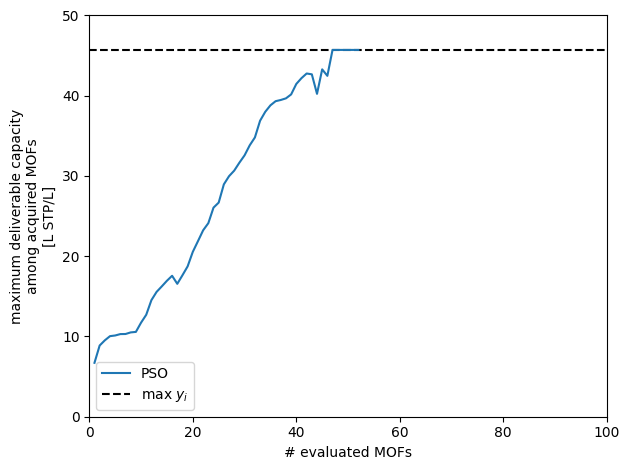

In [ ]:
x_values = np.arange(1, max_num_iterations + 1)
print(x_values)

plt.figure()
#plt.plot(range(1, 101), y_maxes_this_run, color=search_to_color['BO'], clip_on=False)
# plt.scatter(nb_COFs_initialization, y_maxes_this_run[nb_COFs_initialization-1], color=search_to_color['BO'], marker="o")
plt.plot(x_values, y_max_mu, label="PSO", clip_on=False)
plt.fill_between(max_num_iterations, np_y_max_mu - np_y_max_sig_bot, np_y_max_mu + np_y_max_sig_top, alpha=0.2, ec="None")

plt.xlabel('# evaluated MOFs')
plt.ylabel('maximum deliverable capacity\namong acquired MOFs\n[L STP/L]')

plt.axhline(y=45.71, color="k", linestyle="--", label="$\max$ $y_i$", zorder=0)
# axs[0].set_ylim(ymin=0.0)
plt.xlim([0, 100])
plt.ylim([0, 50])
plt.legend()

plt.tight_layout()
plt.savefig("search_efficiency_for_specific_acquisition_run.pdf")
plt.show()

In [ ]:
with open('pso_graph_outputs.pkl', 'wb') as file:
    pickle.dump({'y_max_mu_pso': y_max_mu, 'y_max_sig_bot_pso': y_max_sig_bot, 'y_max_sig_top_pso': y_max_sig_top}, file)

In [ ]:
# Just some other random test code:

import pickle
import numpy as np


X = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['x']
print("shape of X:", np.shape(X))

y = pickle.load(open('hydrogen_input_output.pkl', 'rb'))['y']
print("shape of y:", np.shape(y))

def functionXY(Xinput):
  for i, input in enumerate(X):
    if np.array_equal(Xinput, input):
      return y[i]
  return None

print(X[56])
print(y[56])

print(functionXY(X[56]))

shape of X: (98694, 7)
shape of y: (98694,)
[0.05436893 0.54681128 0.41890404 0.90909091 0.0797649  0.2263727
 0.1648951 ]
10.44
10.44


In [ ]:
y_max_mu_pso = np.array(pickle.load(open('pso_graph_outputs.pkl', 'rb'))['y_max_mu_pso'])
y_max_mu_epso = np.array(pickle.load(open('epso_graph_outputs.pkl', 'rb'))['y_max_mu_epso'])

In [ ]:
print(y_max_mu_pso)

[ 6.717       8.875       9.5194     10.0402     10.1242     10.298
 10.3084     10.5082     10.5702     11.7206     12.7054     14.5248
 15.5558     16.237      16.94387755 17.56367347 16.56170213 17.63065217
 18.73717391 20.54755556 21.88355556 23.23590909 24.12255814 26.05642857
 26.68404762 28.9595122  29.975      30.66820513 31.65657895 32.57138889
 33.82416667 34.80542857 36.88542857 37.99909091 38.805      39.32222222
 39.4725     39.676      40.16529412 41.47       42.19230769 42.7725
 42.66888889 40.236      43.2875     42.48       45.71       45.71
 45.71       45.71       45.71       45.71      ]
